In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,precision_score,recall_score
import matplotlib
import matplotlib.pyplot as plt

In [5]:
prec=[]
recall=[]
threshold=[]
thres=0.45
for temp in range(12):
    df=pd.read_csv("AdmissionDataset/data.csv")
    X =df.drop(['Chance of Admit ','Serial No.'],axis=1)
    y=df['Chance of Admit ']

    X = (X - X.mean())/X.std()
    y=list(y)
    for i in range(len(y)):
        if y[i]>thres:
            y[i]=1
        else:
            y[i]=0
    y=pd.DataFrame({'Chance of Admit ':y

    })


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
    intrain=X_train
    intest=X_test
    # y_train

    def grad(thetaT):
        return 1/(1+np.exp(-thetaT))


    my_data=pd.concat([X_train,y_train],axis=1)

    X=X_train

    ones = np.ones([X.shape[0],1])


    X = np.concatenate((ones,X),axis=1)



    y=pd.DataFrame(y_train)
    y=y.values
    # y

    theta = np.zeros([1,8])


    alpha = 0.01

    iters = 1000

    def gradientDescent(X,y,theta,iters,alpha):
        for i in range(iters):
            theta = theta - (alpha/len(X)) * np.sum(X * (grad(X @ theta.T) - y), axis=0)

        return theta

    g = gradientDescent(X,y,theta,iters,alpha)
    betaList=g[0]
    ones = np.ones([X_test.shape[0],1])
    X_test = np.concatenate((ones,X_test),axis=1)

    y_pred=grad(X_test@betaList)

    y_pred=list(y_pred)
    df=pd.DataFrame({'Admit':y_pred})

    df[df['Admit']<thres]=0
    df[df['Admit']>=thres]=1
    y_pred=list(df['Admit'])
    threshold.append(thres)
    thres=thres+.05
    prec.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))

Text(0.5, 1.0, 'Threshold vs Accuracy')

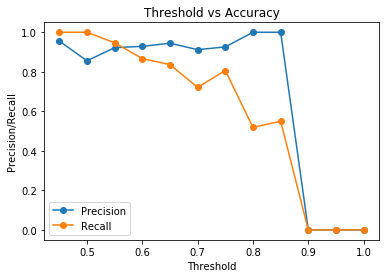

In [6]:
fig, ax = plt.subplots()
ax.plot(threshold,prec, label="Precision",marker="o")
ax.plot(threshold,recall, label="Recall",marker="o")
ax.legend(loc=3) # left left corner
ax.set_xlabel("Threshold", fontsize=10)
ax.set_ylabel("Precision/Recall", fontsize=10)
ax.set_title('Threshold vs Accuracy')